# Hospital Inpatient Discharge Analysis - Sex by Patient County of Residence
- This dataset provides comprehensive information on hospital inpatient discharge, categorized by patient sex and county of residence. It includes data on admission counts, patient demographics, and geographic distribution, making it valuable for analyzing healthcare access, regional health disparities, and sex-based trends in hospitalization.

## Main Objectves - 
1. Pie Chart (To Show Percentage of Discharges per County)

2. Regional Health Insights: Counties with High Discharges

3. Identify the Year with Maximum Discharges

4. Percentage of 'Other, Unknown, Invalid' discharges

5. Line plot for discharge trends over years 

- The First step is to import the important libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- Then Loading the data which is going to be used.

In [3]:
data=pd.read_csv("sexpddmasked.csv")

## Data Cleaning and Preprocessing

- This is very important to know the information about the dataset -> about the columns.

In [ ]:
# this will show the first 5 rows of the dataframe
data.head()

,patcnty1,dsch_yr,Sex,Discharges,AnnotationCode,AnnotationDesc
0,Alameda,2012,Female,85132.0,NaN,NaN
1,Alameda,2012,Male,60305.0,NaN,NaN
2,Alameda,2012,"Other, Unknown, Invalid",10.0,NaN,NaN
3,Alameda,2013,Female,81215.0,NaN,NaN
4,Alameda,2013,Male,58528.0,NaN,NaN


In [ ]:
# this will show the last 5 rows of the dataframe
data.tail()

,patcnty1,dsch_yr,Sex,Discharges,AnnotationCode,AnnotationDesc
1848,Yuba,2022,Male,3782.0,NaN,NaN
1849,Yuba,2022,"Unknown, Invalid",1.0,NaN,NaN
1850,Yuba,2023,Female,5153.0,NaN,NaN
1851,Yuba,2023,Male,3851.0,NaN,NaN
1852,Yuba,2023,"Unknown, Invalid",3.0,NaN,NaN


In [ ]:
data.sample(10)

,patcnty1,dsch_yr,Sex,Discharges,AnnotationCode,AnnotationDesc
225,Del Norte,2022,Female,1378.0,NaN,NaN
757,Mono,2021,Female,330.0,NaN,NaN
1251,San Luis Obispo,2015,Female,13046.0,NaN,NaN
924,Out of State/Homeless,2019,"Unknown, Invalid",21.0,NaN,NaN
1019,Riverside,2020,Male,95225.0,NaN,NaN
588,Madera,2021,Female,7854.0,NaN,NaN
1851,Yuba,2023,Male,3851.0,NaN,NaN
1783,Ventura,2019,"Unknown, Invalid",14.0,NaN,NaN
1593,Stanislaus,2021,Female,33132.0,NaN,NaN
861,Nevada,2022,Male,3891.0,NaN,NaN


In [8]:
data.columns

Index(['patcnty1', 'dsch_yr', 'Sex', 'Discharges', 'AnnotationCode',
       'AnnotationDesc'],
      dtype='object')

In [9]:
data.shape

(1853, 6)

In [10]:
data.size

11118

In [ ]:
# to know the information about the columns and the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1853 entries, 0 to 1852
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patcnty1        1853 non-null   object 
 1   dsch_yr         1853 non-null   int64  
 2   Sex             1853 non-null   object 
 3   Discharges      1843 non-null   float64
 4   AnnotationCode  10 non-null     float64
 5   AnnotationDesc  10 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 87.0+ KB


In [ ]:
# It is important to know the statistics of the data
data.describe()

,dsch_yr,Discharges,AnnotationCode
count,1853.000000,1843.000000,10.000000
mean,2017.555316,24379.040152,1.500000
std,3.468119,63458.800564,0.527046
min,2012.000000,1.000000,1.000000
25%,2015.000000,122.000000,1.000000
50%,2018.000000,4531.000000,1.500000
75%,2021.000000,21070.000000,2.000000
max,2023.000000,628849.000000,2.000000


In [13]:
data.duplicated().sum()

0

In [ ]:
# it is important to know that there is any missing values in the dataset or not
data.isnull().sum()

patcnty1             0
dsch_yr              0
Sex                  0
Discharges          10
AnnotationCode    1843
AnnotationDesc    1843
dtype: int64

- From above we can see there are  missing values in the dataset 
- So need to drop the null rows.

In [15]:
data.isna().sum()

patcnty1             0
dsch_yr              0
Sex                  0
Discharges          10
AnnotationCode    1843
AnnotationDesc    1843
dtype: int64

In [16]:
data.drop(["AnnotationCode","AnnotationDesc"],axis=1,inplace=True)

In [17]:
data.isna().sum()

patcnty1       0
dsch_yr        0
Sex            0
Discharges    10
dtype: int64

In [37]:
data.head()

,patcnty1,dsch_yr,Sex,Discharges
0,Alameda,2012,Female,85132.0
1,Alameda,2012,Male,60305.0
2,Alameda,2012,"Other, Unknown, Invalid",10.0
3,Alameda,2013,Female,81215.0
4,Alameda,2013,Male,58528.0


In [18]:
data.fillna(data.median(numeric_only=True), inplace=True)

In [19]:
data.isna().sum()

patcnty1      0
dsch_yr       0
Sex           0
Discharges    0
dtype: int64

## Data Visualization 

In [20]:
data["dsch_yr"].value_counts()

dsch_yr
2023    163
2022    161
2015    157
2016    157
2020    154
2021    154
2014    153
2013    152
2018    152
2019    152
2012    150
2017    148
Name: count, dtype: int64

<Axes: >

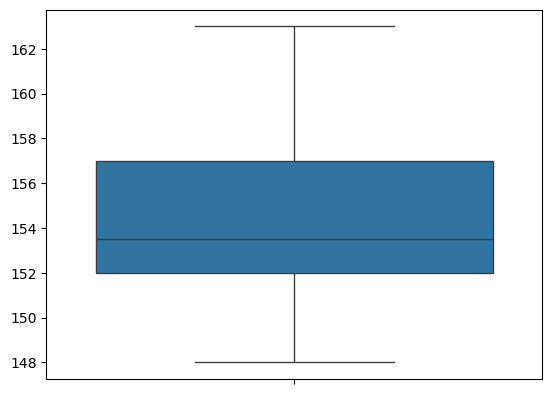

In [21]:
sns.boxplot(data["dsch_yr"].value_counts().values)

In [22]:
data['patcnty1'].value_counts()

patcnty1
Alameda                  36
Los Angeles              36
Ventura                  36
Stanislaus               36
Santa Clara              36
Santa Barbara            36
San Mateo                36
San Joaquin              36
San Francisco            36
San Diego                36
San Bernardino           36
Sacramento               36
Orange                   36
Monterey                 36
Out of State/Homeless    36
Contra Costa             36
Tulare                   35
Humboldt                 35
Riverside                35
San Luis Obispo          35
Sonoma                   35
Fresno                   35
Napa                     35
Kern                     35
Madera                   35
Solano                   34
Santa Cruz               34
Merced                   34
Placer                   34
El Dorado                33
Marin                    32
San Benito               32
Nevada                   31
Yolo                     30
Shasta                   29
Butte      

Text(0, 0.5, 'Count')

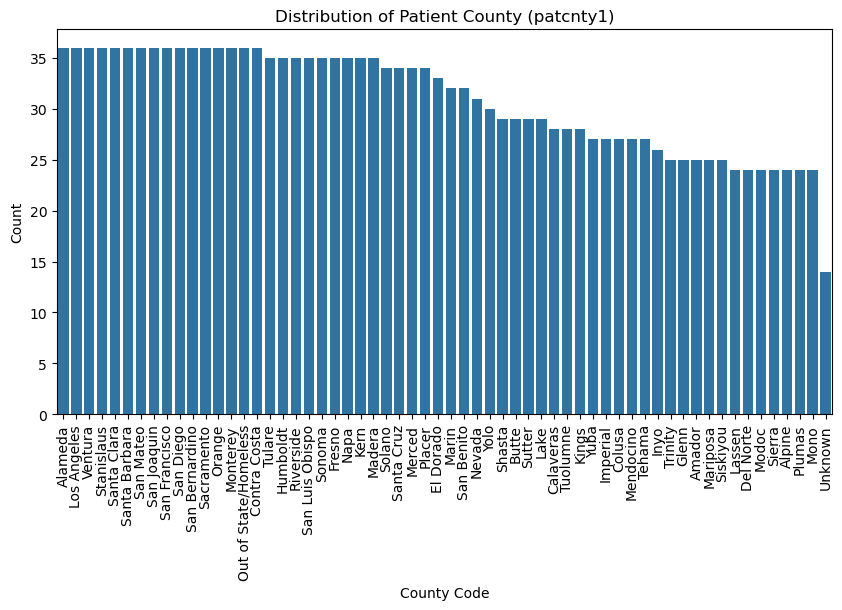

In [23]:
plt.figure(figsize=(10, 5))
sns.countplot(x=data["patcnty1"], order=data["patcnty1"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Distribution of Patient County (patcnty1)")
plt.xlabel("County Code")
plt.ylabel("Count")

In [24]:
max_county = data["patcnty1"].value_counts().idxmax()  
min_county = data["patcnty1"].value_counts().idxmin()  
max_count = data["patcnty1"].value_counts().max()  
min_count = data["patcnty1"].value_counts().min()
print(f"County with most patients: {max_county} ({max_count} patients)")
print(f"County with least patients: {min_county} ({min_count} patients)")

County with most patients: Alameda (36 patients)
County with least patients: Unknown (14 patients)


In [25]:
data.groupby("dsch_yr")["Discharges"].sum()


dsch_yr
2012    3891771.0
2013    3806911.0
2014    3803301.0
2015    3833043.0
2016    3842621.0
2017    3865224.0
2018    3819381.0
2019    3836238.0
2020    3453568.0
2021    3557587.0
2022    3603421.0
2023    3662815.0
Name: Discharges, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, '2012'),
  Text(1, 0, '2013'),
  Text(2, 0, '2014'),
  Text(3, 0, '2015'),
  Text(4, 0, '2016'),
  Text(5, 0, '2017'),
  Text(6, 0, '2018'),
  Text(7, 0, '2019'),
  Text(8, 0, '2020'),
  Text(9, 0, '2021'),
  Text(10, 0, '2022'),
  Text(11, 0, '2023')])

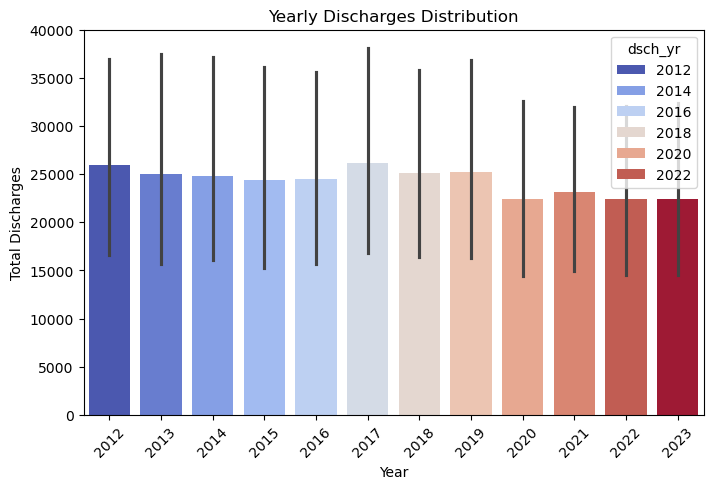

In [26]:
plt.figure(figsize=(8, 5))
sns.barplot(x="dsch_yr", y="Discharges", palette="coolwarm",data=data,hue="dsch_yr")

plt.xlabel("Year")
plt.ylabel("Total Discharges")
plt.title("Yearly Discharges Distribution")
plt.xticks(rotation=45)

Text(0, 0.5, 'Frequency')

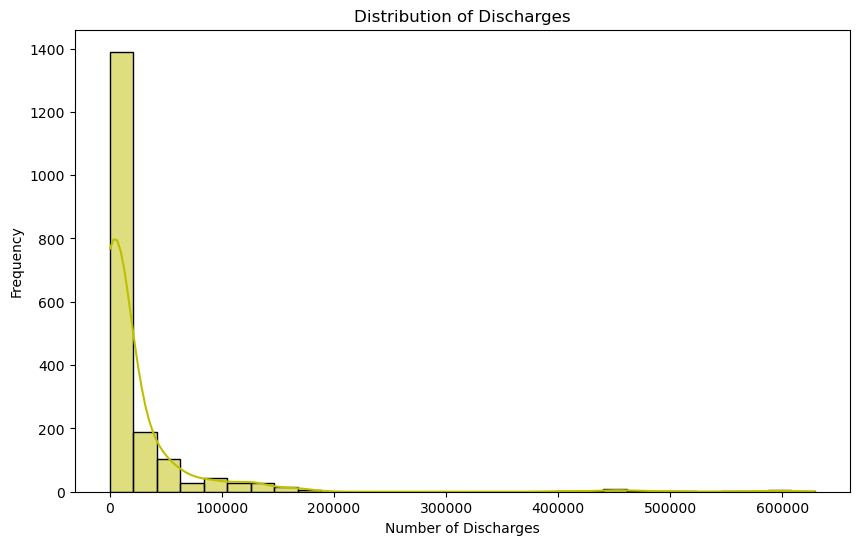

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(data["Discharges"].dropna(),bins=30, kde=True, color="y")
plt.title("Distribution of Discharges")
plt.xlabel("Number of Discharges")
plt.ylabel("Frequency")



In [28]:
a=data.corr(numeric_only=True)

<Axes: >

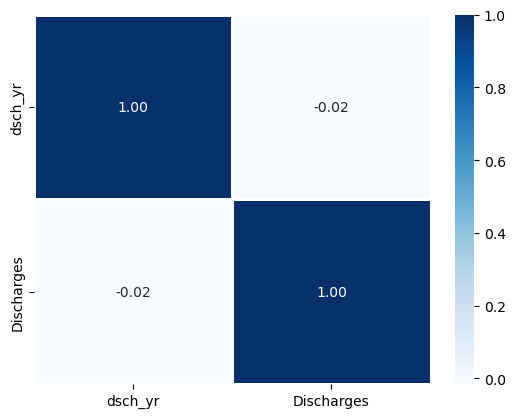

In [29]:
sns.heatmap(a,fmt="0.2f",cmap="Blues",linewidth=1,annot=True)

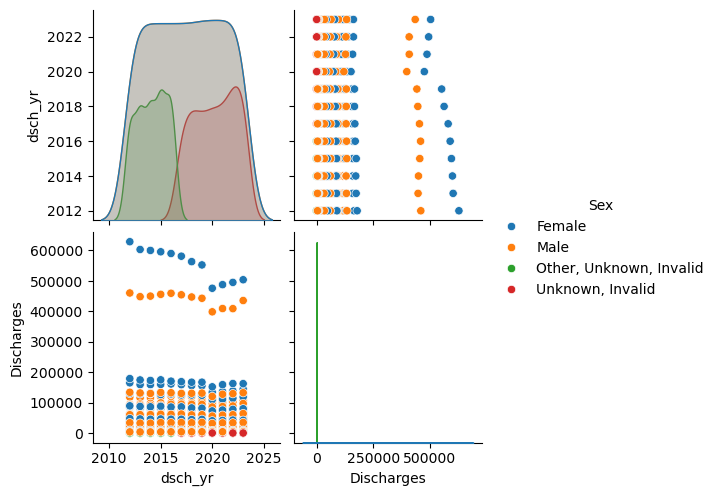

In [31]:
sns.pairplot(data,hue="Sex")

## 1. Pie Chart (To Show Percentage of Discharges per County)

Text(0.5, 1.0, 'Top 10 Counties by Discharges')

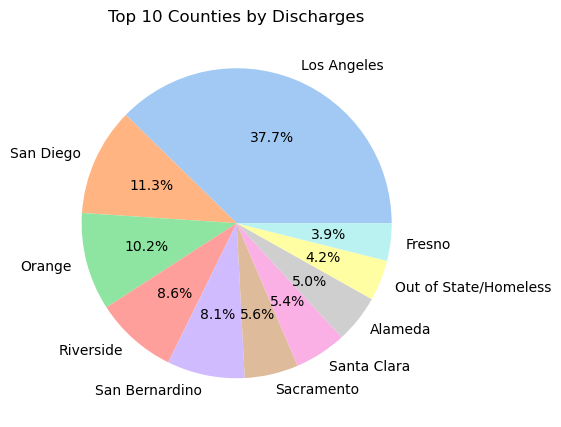

In [32]:
top_counties = data.groupby("patcnty1")["Discharges"].sum().nlargest(10) 

plt.figure(figsize=(5, 8))
plt.pie(top_counties, labels=top_counties.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Top 10 Counties by Discharges")

## 2.Regional Health Insights: Counties with High Discharges

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Los Angeles'),
  Text(1, 0, 'San Diego'),
  Text(2, 0, 'Orange'),
  Text(3, 0, 'Riverside'),
  Text(4, 0, 'San Bernardino'),
  Text(5, 0, 'Sacramento'),
  Text(6, 0, 'Santa Clara'),
  Text(7, 0, 'Alameda'),
  Text(8, 0, 'Out of State/Homeless'),
  Text(9, 0, 'Fresno')])

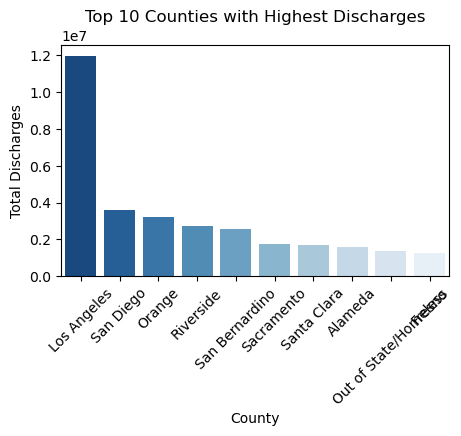

In [34]:
county_discharges = data.groupby("patcnty1")["Discharges"].sum().reset_index()
top_counties = county_discharges.sort_values(by="Discharges", ascending=False).head(10)
plt.figure(figsize=(5, 3))
sns.barplot(data=top_counties, x="patcnty1", y="Discharges",hue="patcnty1", palette="Blues_r")

plt.xlabel("County")
plt.ylabel("Total Discharges")
plt.title("Top 10 Counties with Highest Discharges")
plt.xticks(rotation=45)

## 3. Identify the Year with Maximum Discharges

In [35]:
yearly_discharges = data.groupby("dsch_yr")["Discharges"].sum()

max_discharge_year = yearly_discharges.idxmax()
max_discharges = yearly_discharges.max()

print(f"The year with the highest discharges is: {max_discharge_year} with {max_discharges} discharges.")

The year with the highest discharges is: 2012 with 3891771.0 discharges.


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, '3453568.0'),
  Text(1, 0, '3557587.0'),
  Text(2, 0, '3603421.0'),
  Text(3, 0, '3662815.0'),
  Text(4, 0, '3803301.0'),
  Text(5, 0, '3806911.0'),
  Text(6, 0, '3819381.0'),
  Text(7, 0, '3833043.0'),
  Text(8, 0, '3836238.0'),
  Text(9, 0, '3842621.0'),
  Text(10, 0, '3865224.0'),
  Text(11, 0, '3891771.0')])

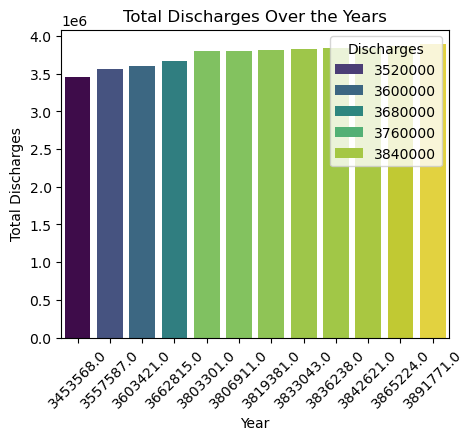

In [36]:
plt.figure(figsize=(5,4))
sns.barplot(x=yearly_discharges, y=yearly_discharges, palette="viridis",hue=yearly_discharges)
plt.title("Total Discharges Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Discharges")
plt.xticks(rotation=45)

## 4. Percentage of 'Other, Unknown, Invalid' discharges

In [41]:
total_discharges = data["Discharges"].sum()
other_unknown_invalid_discharges = data[data["Sex"] == "Other, Unknown, Invalid"]["Discharges"].sum()
percentage_other = (other_unknown_invalid_discharges / total_discharges) * 100
print(f"Percentage of discharges under 'Other, Unknown, Invalid' gender: {percentage_other:.4f}%")


Percentage of discharges under 'Other, Unknown, Invalid' gender: 0.0040%


## 5. Line plot for discharge trends over years

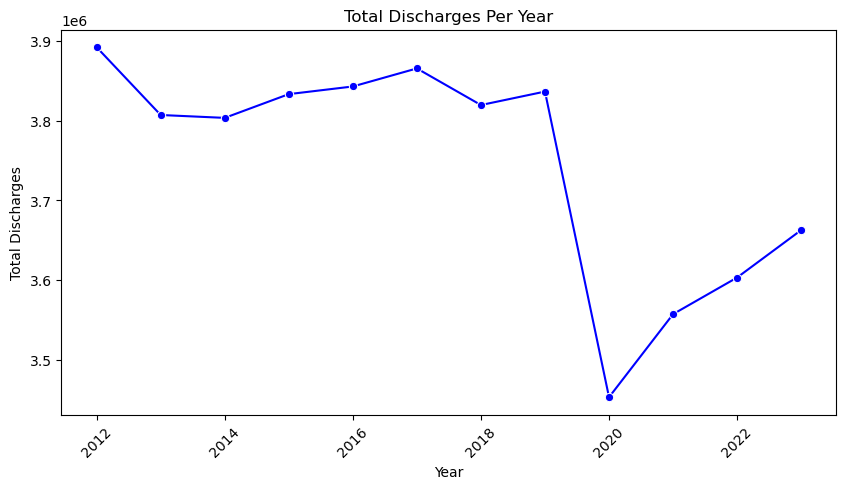

In [43]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=data.groupby("dsch_yr")["Discharges"].sum().index, 
             y=data.groupby("dsch_yr")["Discharges"].sum().values, marker="o", color="b")
plt.title("Total Discharges Per Year")
plt.xlabel("Year")
plt.ylabel("Total Discharges")
plt.xticks(rotation=45)
plt.show()

## 6. Pie chart for gender distribution

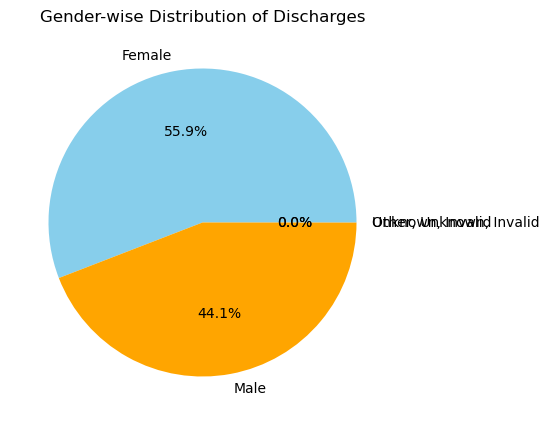

In [45]:
gender_distribution = data.groupby("Sex")["Discharges"].sum()
plt.figure(figsize=(5, 5))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct="%1.1f%%", colors=["skyblue", "orange", "gray"])
plt.title("Gender-wise Distribution of Discharges")

## 7.  Donut chart for 'Other, Unknown, Invalid' gender discharges

Text(0.5, 1.0, "Proportion of 'Other, Unknown, Invalid' Discharges")

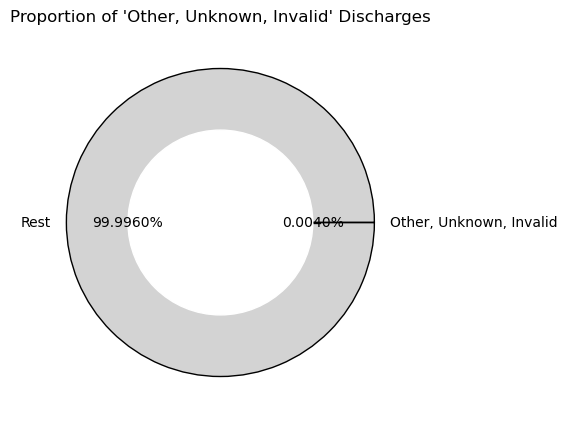

In [47]:
plt.figure(figsize=(5, 5))
plt.pie([gender_distribution["Other, Unknown, Invalid"], total_discharges - gender_distribution["Other, Unknown, Invalid"]],
        labels=["Other, Unknown, Invalid", "Rest"], autopct="%1.4f%%", colors=["red", "lightgray"], wedgeprops={'edgecolor': 'black'})
plt.gca().add_artist(plt.Circle((0, 0), 0.6, color="white"))  # Create a hole in the middle (donut chart)
plt.title("Proportion of 'Other, Unknown, Invalid' Discharges")